# Basic statistics for web_pages.csv file

Let's check our `data` directory, and make sure they've downloaded.


# Libraries to load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


# Let's start the pivot tables

## Loading of web_pages.csv as dataframe

In [2]:
#web_pages =  pd.read_csv('data/web-pages.csv', nrows=1000) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
web_pages =  pd.read_csv('data/web-pages.csv')
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20200309,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/inde...,text/html,text/html,en,Coronavirus Disease 2019 (COVID-19) | CDC Skip...
1,20200309,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/inde...,text/html,text/html,en,Coronavirus Disease 2019 (COVID-19) | CDC Skip...
2,20200309,wwwnc.cdc.gov,https://wwwnc.cdc.gov/travel/page/covid-19-cru...,text/html,text/html,en,COVID-19 and Cruise Ship Travel | Travelers' ...
3,20200309,api.addthis.com,https://api.addthis.com/oexchange/0.8/forward/...,text/html,application/xhtml+xml,en,Missing Required Parameter Your request is mis...
4,20200309,api.addthis.com,https://api.addthis.com/oexchange/0.8/forward/...,text/html,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6699389,20200421,isciii.es,https://www.isciii.es/QueHacemos/Servicios/Vig...,text/html,text/html,es,Informes MoMo 2020 ISCIII Inicio de sesión ca...
6699390,20200421,isciii.es,https://www.isciii.es/QueHacemos/Servicios/Vig...,text/html,text/html,es,Inicio ISCIII Inicio de sesión castellano eng...
6699391,20200421,facebook.com,https://www.facebook.com/login.php?next=https%...,text/html,text/html,en,Facebook Facebook You must log in to continue....
6699392,20200421,isciii.es,https://www.isciii.es/QueHacemos/Financiacion/...,text/html,text/html,es,Páginas - Financiación ISCIII Inicio de sesió...


## Count number of harvesting by day

In [3]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_count_byCrawlDate = web_pages.groupby(['crawl_date']).size()
web_pages_count_byCrawlDate.to_csv('generated/web_pages_count_byCrawlDate.csv')
web_pages_count_byCrawlDate

crawl_date
20200221    25728
20200222    86217
20200223    60613
20200224    35150
20200225    31913
            ...  
20210731    11210
20210801    13428
20210802    17352
20210803     7437
20210804     4589
Length: 360, dtype: int64

Text(0, 0.5, 'Count')

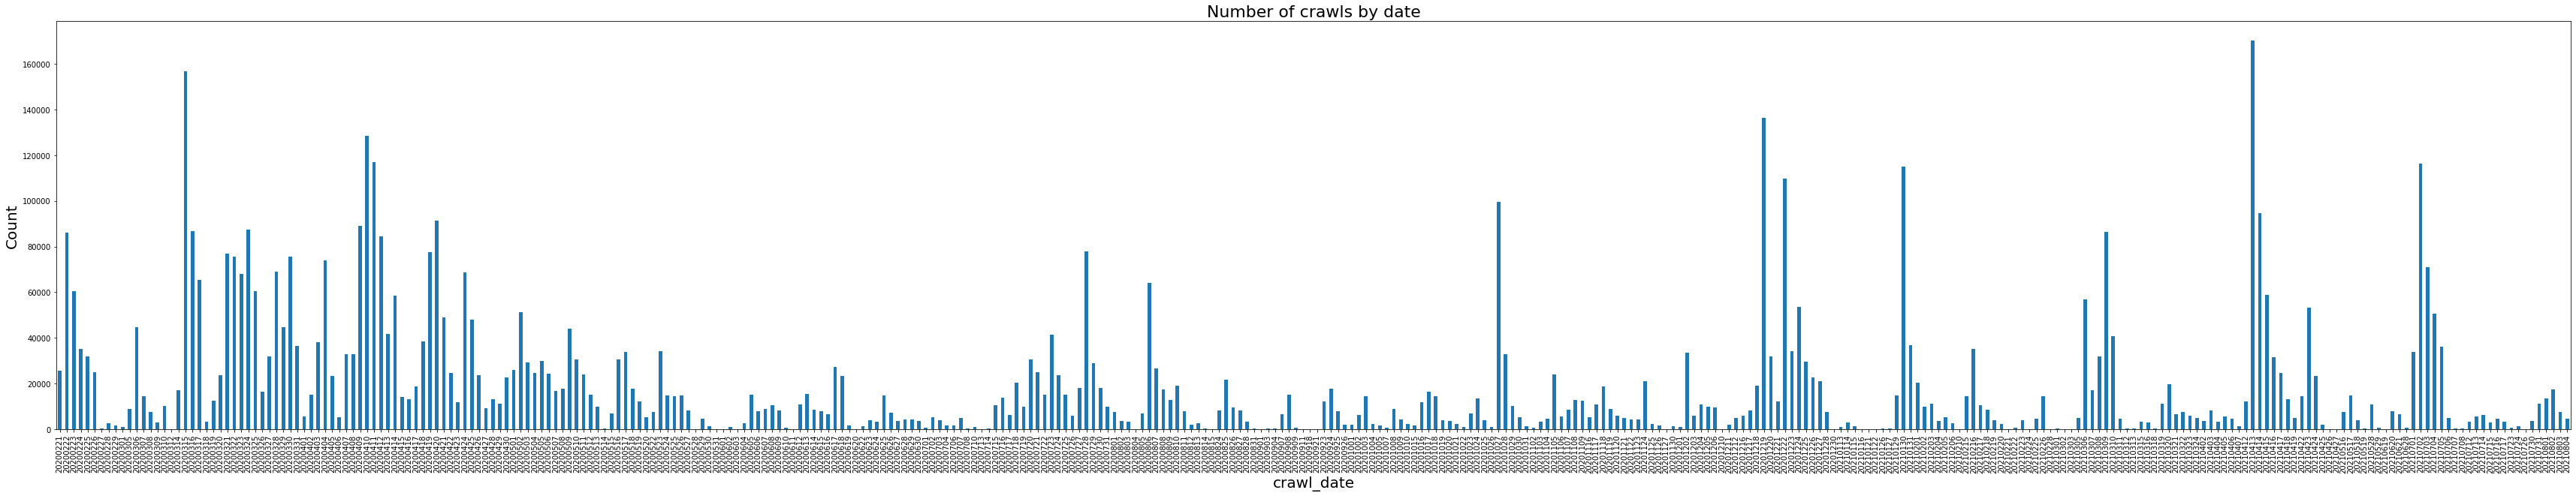

In [4]:
#pd.read_csv('generated/web_pages_count_byCrawlDate.csv')
#plt.plot('0','crawl_date')
web_pages_count_byCrawlDate_chart = web_pages_count_byCrawlDate.plot.bar(figsize=(60, 10))

web_pages_count_byCrawlDate_chart.set_title("Number of crawls by date", fontsize=22)
web_pages_count_byCrawlDate_chart.set_xlabel("crawl_date", fontsize=20)
web_pages_count_byCrawlDate_chart.set_ylabel("Count", fontsize=20)

#initial code for this graph by Nick Ruest

## Domain frequency

In [5]:
web_pages_count_byDomain = web_pages.groupby(['domain']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

domain
twitter.com                          212409
facebook.com                         146781
youtube.com                           75608
coronavirus.rutgers.edu               70082
accounts.google.com                   68489
                                      ...  
mycielo.org                               1
contest.collegehoops.masslive.com         1
contentz.mkt922.com                       1
mychart.premierhealthpartners.org         1
hutcakes23.blogspot.com                   1
Length: 161743, dtype: int64

In [6]:
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

,domain,0
0,twitter.com,212409
1,facebook.com,146781
2,youtube.com,75608
3,coronavirus.rutgers.edu,70082
4,accounts.google.com,68489
...,...,...
161738,mycielo.org,1
161739,contest.collegehoops.masslive.com,1
161740,contentz.mkt922.com,1
161741,mychart.premierhealthpartners.org,1


Text(0, 0.5, 'Count')

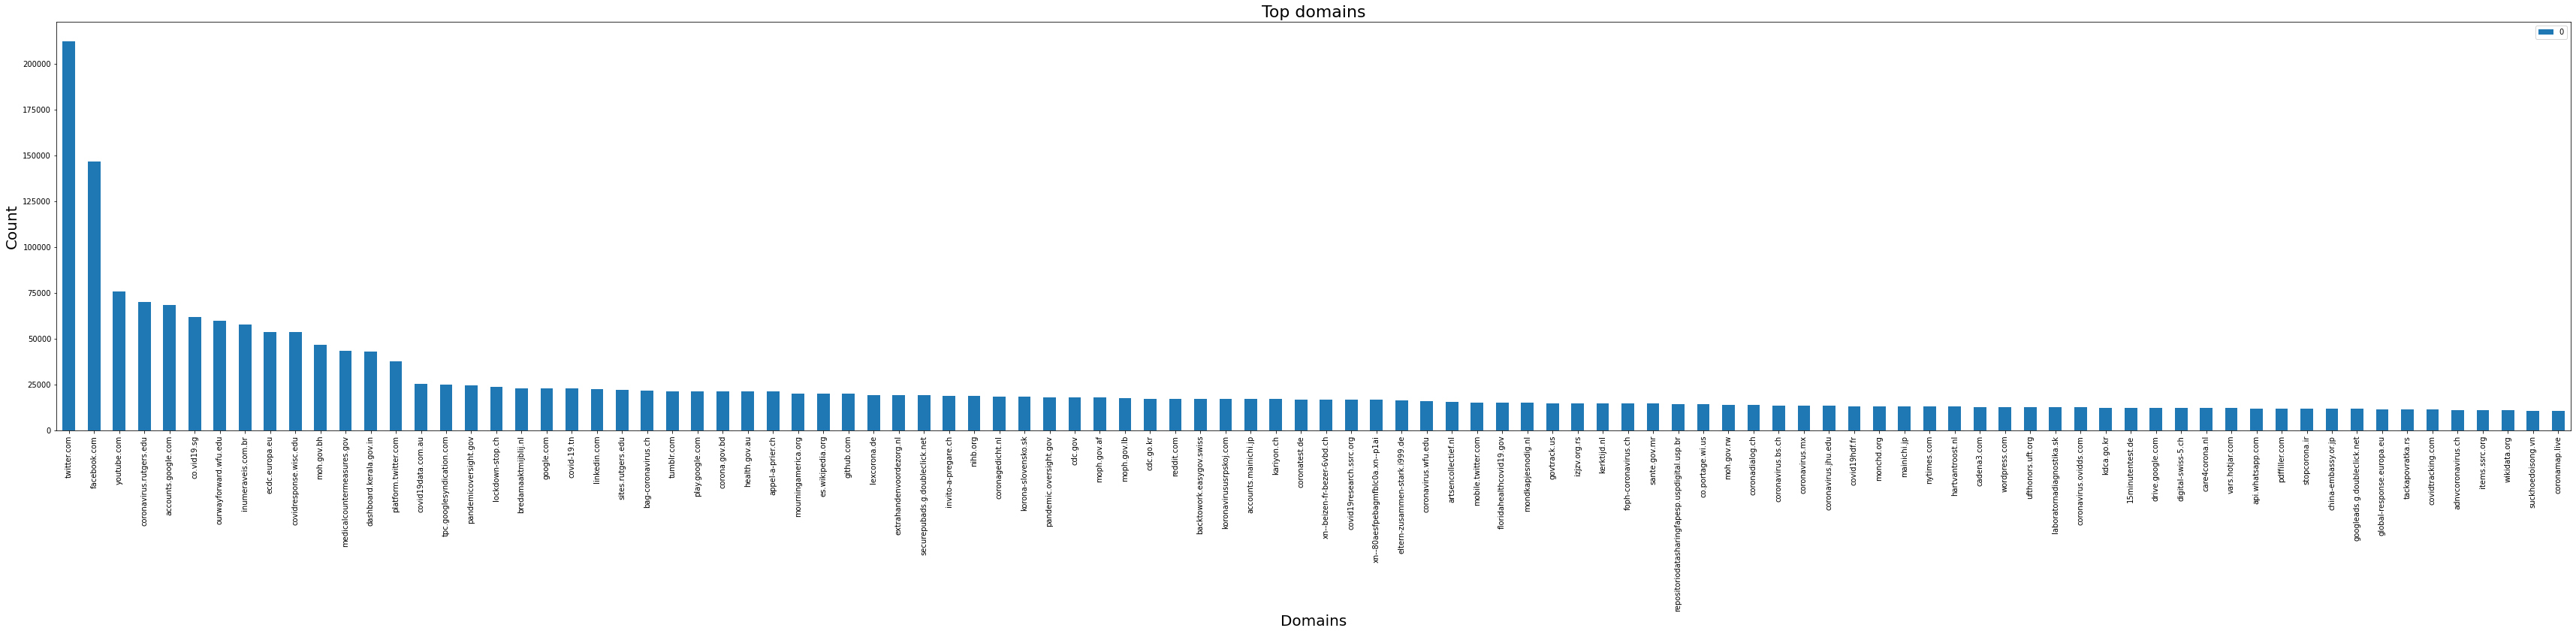

In [7]:
topDomain = web_pages_count_byDomain.sort_values("0", ascending=False).head(100)

topDomain_chart = topDomain.plot.bar(figsize=(60, 10), x="domain")

topDomain_chart.set_title("Top domains", fontsize=22)
topDomain_chart.set_xlabel("Domains", fontsize=20)
topDomain_chart.set_ylabel("Count", fontsize=20)

## Crawl by language (by date)

Text(0, 0.5, 'Count')

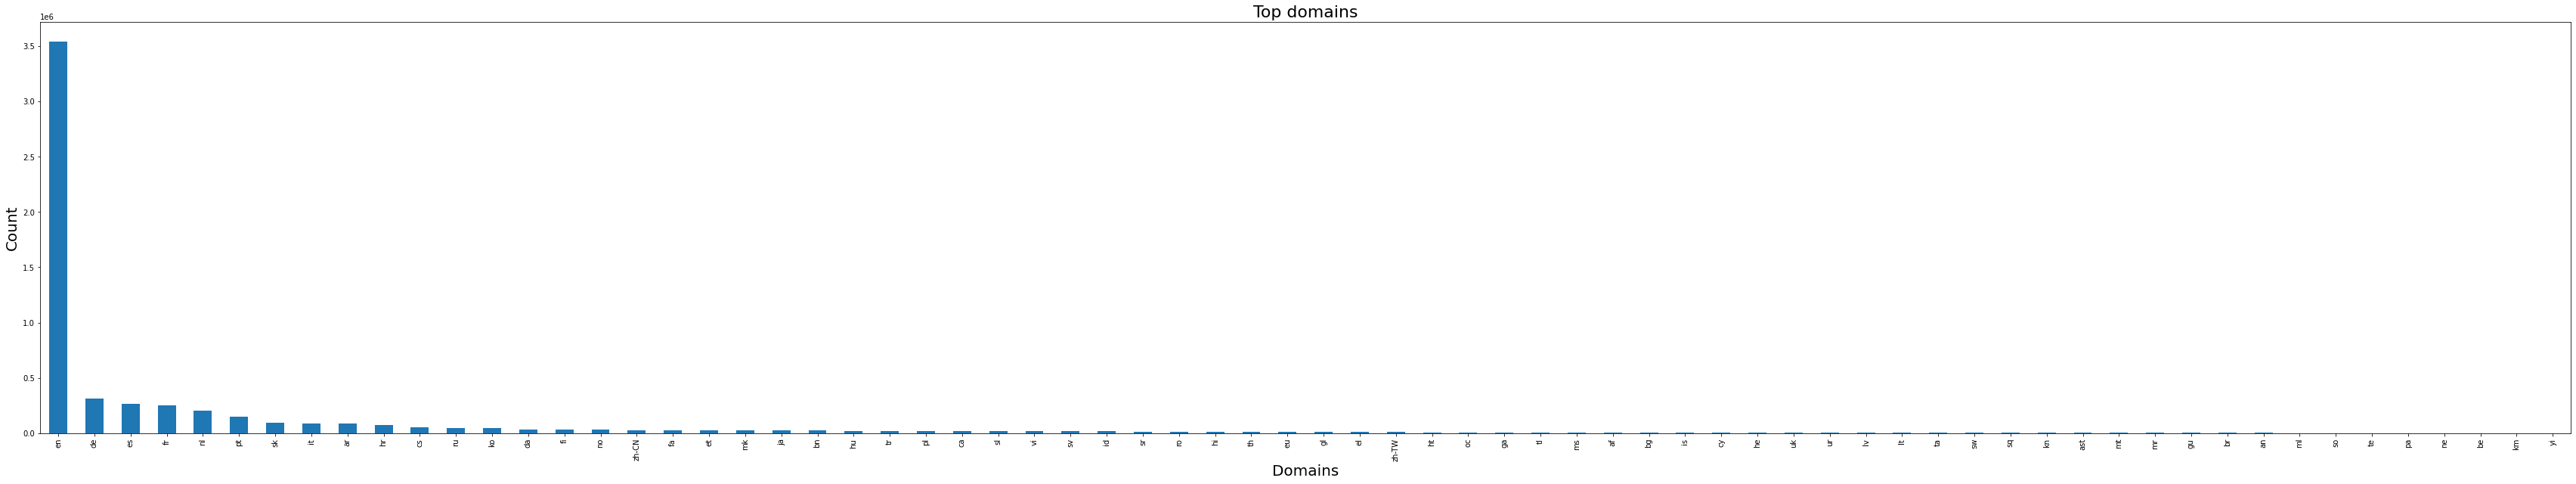

In [8]:
# Présence des langues

web_pages_byLanguage = web_pages.groupby(['language']).size()
web_pages_byLanguage = web_pages_byLanguage.sort_values(ascending=False)
web_pages_byLanguage.to_csv('generated/web_pages_byLanguage.csv')
web_pages_byLanguage

language_chart = web_pages_byLanguage.plot.bar(figsize=(60, 10), x="domain")

language_chart.set_title("Top domains", fontsize=22)
language_chart.set_xlabel("Domains", fontsize=20)
language_chart.set_ylabel("Count", fontsize=20)

In [9]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_byCrawlDate_byLanguage = web_pages.groupby(['language','crawl_date']).size()
web_pages_byCrawlDate_byLanguage.to_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage

language  crawl_date
af        20200221       94
          20200222      220
          20200223       10
          20200224       22
          20200225       23
                       ... 
zh-TW     20210714      512
          20210715      250
          20210723      198
          20210724      999
          20210726       10
Length: 10967, dtype: int64

In [10]:
web_pages_byCrawlDate_byLanguage = pd.read_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage



,language,crawl_date,0
0,af,20200221,94
1,af,20200222,220
2,af,20200223,10
3,af,20200224,22
4,af,20200225,23
...,...,...,...
10962,zh-TW,20210714,512
10963,zh-TW,20210715,250
10964,zh-TW,20210723,198
10965,zh-TW,20210724,999


In [11]:
## Altair has a default limit of 5000 rows, and this DataFrame is ~11000 rows, so we're going to disable the max allowed rows.
alt.data_transformers.disable_max_rows()

crawl_chart = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
    .mark_bar()
    .encode(
        x="crawl_date:O",
        y="0:Q",
        color="language",
        tooltip="language",
        order=alt.Order("language", sort="descending"),
    )
)

crawl_chart.properties(width=1400, height=700, title="Crawl frequency by language")

alt.Chart(...)

In [60]:
# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

crawl_stream = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
        .mark_bar()
        .encode(
            alt.Tooltip("language"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('0:Q', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            )
    ).interactive()
)

crawl_stream.properties(width=1000, height=500, title="Crawl frequency by language")

alt.Chart(...)

## We end this notebook by looking at the mime/type# Présence des langues


Text(26.19999999999999, 0.5, 'Count')

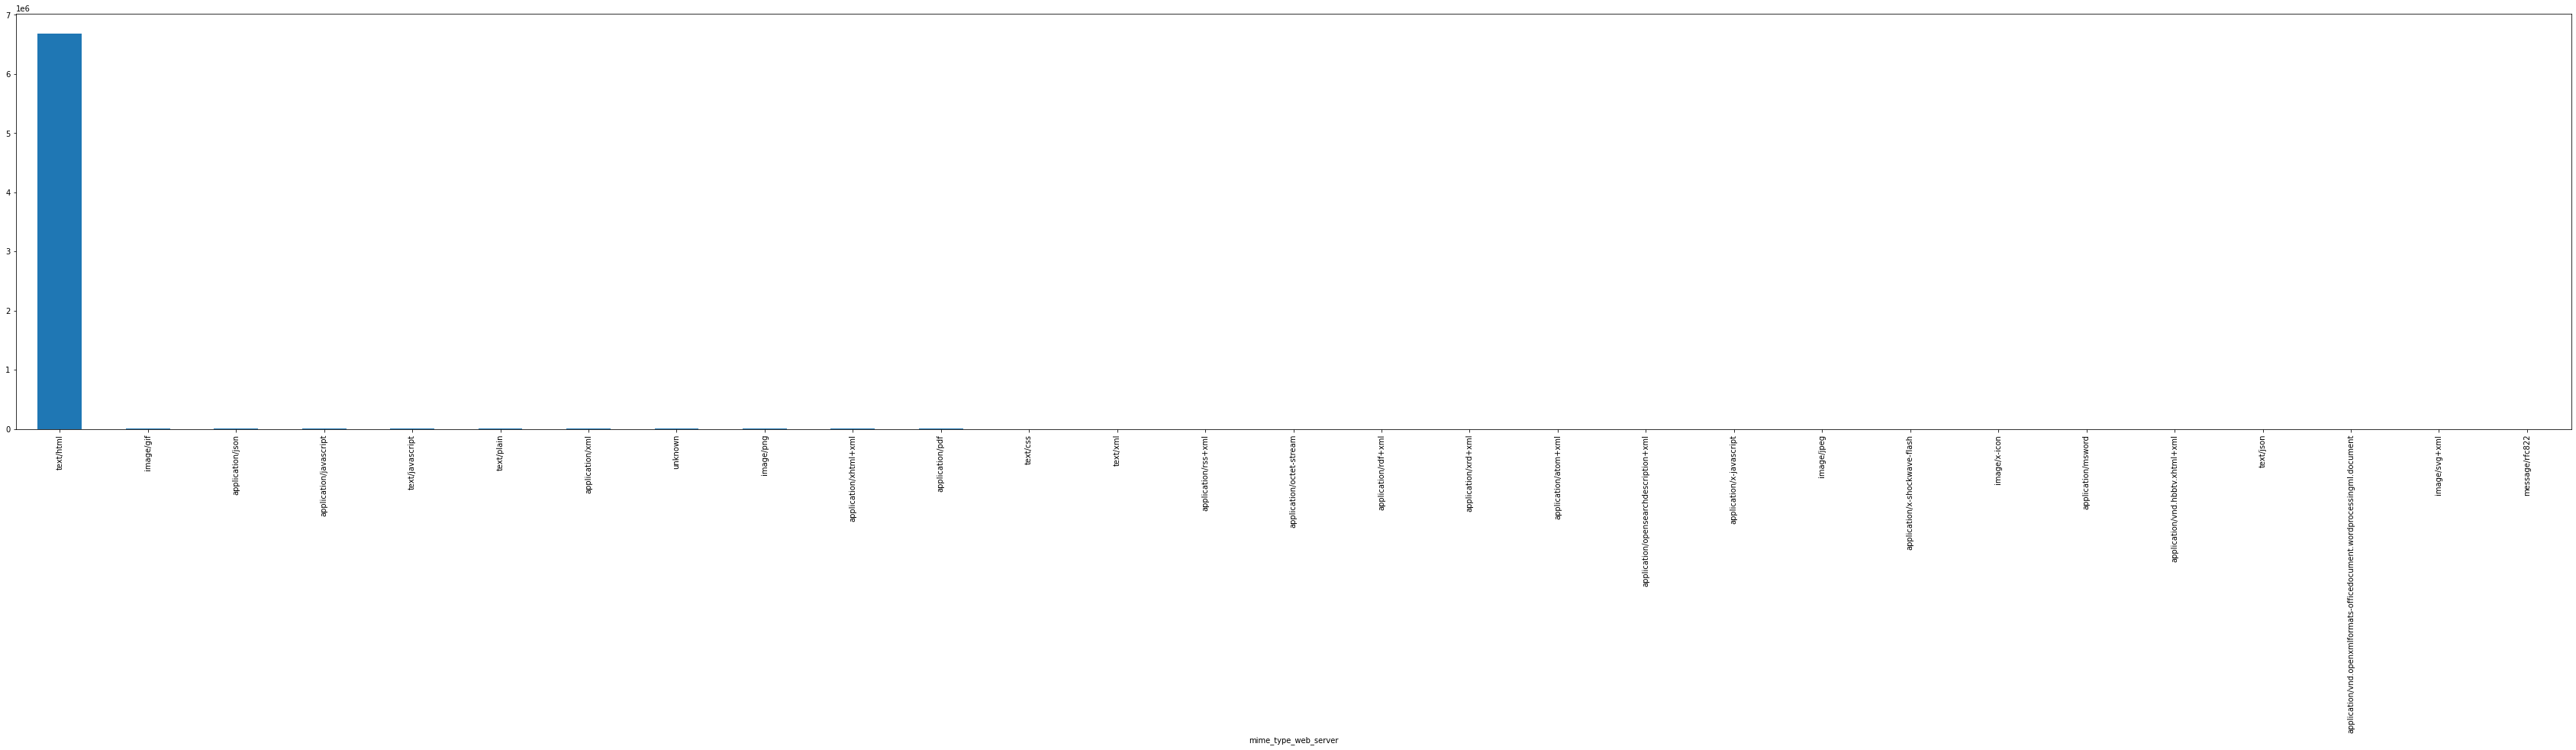

In [65]:
web_pages_byMIME = web_pages.groupby(['mime_type_web_server']).size()
web_pages_byMIME = web_pages_byMIME.sort_values(ascending=False)
web_pages_byMIME.to_csv('generated/web_pages_byMIME.csv')
web_pages_byMIME

MIME_chart = web_pages_byMIME.plot.bar(figsize=(60, 10), x="mime_type_web_server")

language_chart.set_title("Type MIME", fontsize=22)
language_chart.set_xlabel("types", fontsize=20)
language_chart.set_ylabel("Count", fontsize=20)